# Homework 6

February 11, 2021

In [1]:
library(car)
library(ez)
library(tidyr)
library(nlme)
library(lme4)
library(lmerTest)
library(lattice)
library(dplyr)

Loading required package: carData
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘lme4’

The following object is masked from ‘package:nlme’:

    lmList


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step


Attaching package: ‘dplyr’

The following object is masked from ‘package:nlme’:

    collapse

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘packag

#### 1.  Redo Problem 2 (Jesse) from last week using glmer.  You already have the datafile.

In [2]:
#load data
rt = read.csv('./data_files//jesse_search_data.csv')
dim(rt)
head(rt, 20)

[1] 360   6

sub,rt,set_size,identity,presence,orientation
1,0.4851,2,1,1,1
1,0.5002,4,1,1,1
1,0.5041,6,1,1,1
1,0.4842,2,1,2,1
1,0.4956,4,1,2,1
1,0.4945,6,1,2,1
1,0.4909,2,1,1,2
1,0.5114,4,1,1,2
1,0.6035,6,1,1,2
1,0.4881,2,1,2,2


In [3]:
#limit to present condition
rt_present = rt[rt$presence == 1,]
dim(rt_present)

[1] 180   6

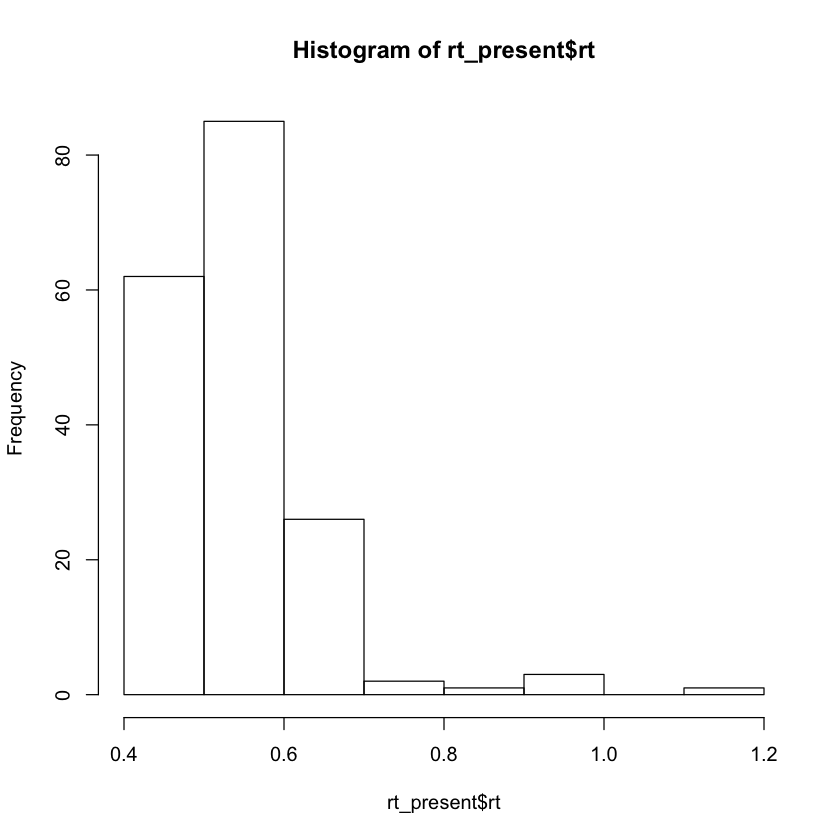

In [4]:
hist(rt_present$rt)

In [5]:
# old lmer model
lmer_mod <- lmer(rt ~ scale(set_size) * orientation + (1|sub) + (1|identity) , data= rt_present, REML = F)
summary(lmer_mod)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: rt ~ scale(set_size) * orientation + (1 | sub) + (1 | identity)
   Data: rt_present

     AIC      BIC   logLik deviance df.resid 
  -436.6   -414.2    225.3   -450.6      173 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8016 -0.4860 -0.0946  0.3630  6.2063 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub      (Intercept) 0.0045432 0.06740 
 identity (Intercept) 0.0001708 0.01307 
 Residual             0.0039806 0.06309 
Number of obs: 180, groups:  sub, 10; identity, 3

Fixed effects:
                              Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   0.485067   0.027063  20.543000  17.924 5.13e-14
scale(set_size)              -0.011460   0.014912 167.914849  -0.768   0.4433
orientation                   0.039829   0.009405 167.914849   4.235 3.76e-05
scale(set_size):orientation   0.020967   0.009431 1

In [6]:
#instead of transforming, let's use a non-normal function to model the DV
glmer1 = glmer(rt ~ scale(set_size)*orientation + (1|sub), family=Gamma(link=log),data=rt_present)
summary(glmer1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( log )
Formula: rt ~ scale(set_size) * orientation + (1 | sub)
   Data: rt_present

     AIC      BIC   logLik deviance df.resid 
  -530.4   -511.3    271.2   -542.4      174 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2660 -0.5214 -0.1221  0.3941  5.1726 

Random effects:
 Groups   Name        Variance Std.Dev.
 sub      (Intercept) 0.004036 0.06353 
 Residual             0.010985 0.10481 
Number of obs: 180, groups:  sub, 10

Fixed effects:
                            Estimate Std. Error t value Pr(>|z|)    
(Intercept)                 -0.71419    0.05568 -12.826  < 2e-16 ***
scale(set_size)             -0.01698    0.02213  -0.767   0.4428    
orientation                  0.06457    0.01396   4.626 3.74e-06 ***
scale(set_size):orientation  0.03471    0.01399   2.481   0.0131 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlat

In [7]:
#instead of transforming, let's use a non-normal function to model the DV
glmer2 = glmer(rt ~ scale(set_size)*orientation + (1|sub) + (1|identity), family=Gamma(link=log),data=rt_present)
summary(glmer2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( log )
Formula: rt ~ scale(set_size) * orientation + (1 | sub) + (1 | identity)
   Data: rt_present

     AIC      BIC   logLik deviance df.resid 
  -533.2   -510.8    273.6   -547.2      173 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1714 -0.5166 -0.1442  0.3586  5.0532 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub      (Intercept) 0.0040203 0.06341 
 identity (Intercept) 0.0002959 0.01720 
 Residual             0.0106734 0.10331 
Number of obs: 180, groups:  sub, 10; identity, 3

Fixed effects:
                            Estimate Std. Error t value Pr(>|z|)    
(Intercept)                 -0.71410    0.09462  -7.547 4.44e-14 ***
scale(set_size)             -0.01684    0.07181  -0.235    0.815    
orientation                  0.06403    0.04753   1.347    0.178    
scale(set_size):orientation  0.03456    0.04763   0.726    0.468    
--

In [8]:
# try random slopes of subject within orientation
glmer3 = glmer(rt ~ scale(set_size)*orientation + (1 + orientation|sub) + (1 + orientation|identity), family=Gamma(link=log),data=rt_present)
summary(glmer3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( log )
Formula: rt ~ scale(set_size) * orientation + (1 + orientation | sub) +  
    (1 + orientation | identity)
   Data: rt_present

     AIC      BIC   logLik deviance df.resid 
  -581.1   -546.0    301.5   -603.1      169 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2197 -0.4692 -0.0576  0.4310  4.2114 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 sub      (Intercept) 0.008831 0.09398       
          orientation 0.004246 0.06516  -0.81
 identity (Intercept) 0.002078 0.04558       
          orientation 0.001214 0.03484  -0.96
 Residual             0.007473 0.08645       
Number of obs: 180, groups:  sub, 10; identity, 3

Fixed effects:
                            Estimate Std. Error t value Pr(>|z|)    
(Intercept)                 -0.71357    0.08494  -8.401  < 2e-16 ***
scale(set_size)             -0.01553    0.01776  -0.874  0.3818

This model has allows for random slopes and intercepts of subject and identity within orientation. It uses a gamma distribution to model the positively skewed rt DV, allowing us to keep rt in raw time units while also not assuming a normal distribution. Further it has the lowest AIC of any of my models, so I would use this model as my final version. It shows a significant (p < 0.005) interaction between set_size and orientation.

#### A former grad student ran a study here (well after graduating) on eye-movements as a predictor of face familiarity.  Here are two eye-movement parameters: probability of a leftward movement and the number of clusters.  Were those two predictor variables, or IVs, significantly related to familiarity? (Data in frank_trial_data)

In [9]:
eye = read.csv('data_files//frank_trial_data.csv')
dim(eye)
head(eye, 10)

[1] 150   6

subj_id,System,pic_id,NumClus,Pleft,Class
203,20,220,5,0.14285,F
203,20,221,8,0.14285,F
203,20,222,6,0.15384,F
203,20,223,9,0.83333,F
203,20,224,5,0.30000,F
203,20,225,6,0.58333,F
203,20,226,10,0.37500,F
203,20,229,8,0.55555,F
203,20,230,7,0.35714,F
203,20,231,7,0.46153,F


In [10]:
aggregate(Pleft ~ Class, eye,  mean)
aggregate(Pleft ~ Class, eye,  sd)

Class,Pleft
F,0.5479643
U,0.6784595


Class,Pleft
F,0.2770703
U,0.2336681


In [11]:
aggregate(NumClus ~ Class, eye,  mean)
aggregate(NumClus ~ Class, eye,  sd)

Class,NumClus
F,6.162162
U,4.552632


Class,NumClus
F,1.775225
U,1.611581


In [12]:
m_norm <- lmer(as.numeric(Class) ~ Pleft * NumClus + (1|subj_id), data=eye, REML=FALSE)
summary(m_norm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: as.numeric(Class) ~ Pleft * NumClus + (1 | subj_id)
   Data: eye

     AIC      BIC   logLik deviance df.resid 
   185.0    203.1    -86.5    173.0      144 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.00264 -0.86206  0.00189  0.72870  2.01853 

Random effects:
 Groups   Name        Variance Std.Dev.
 subj_id  (Intercept) 0.008417 0.09174 
 Residual             0.180583 0.42495 
Number of obs: 150, groups:  subj_id, 4

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     1.843266   0.283455 145.137877   6.503 1.19e-09 ***
Pleft           0.571737   0.405032 146.353704   1.412   0.1602    
NumClus        -0.123000   0.051927 148.545724  -2.369   0.0191 *  
Pleft:NumClus  -0.008913   0.075831 146.313823  -0.118   0.9066    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fix

In [15]:
m_gamma <- glmer(Class ~ Pleft * NumClus + (1|subj_id), data=eye, family = binomial(link = logit))
summary(m_gamma)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Class ~ Pleft * NumClus + (1 | subj_id)
   Data: eye

     AIC      BIC   logLik deviance df.resid 
   174.5    189.6    -82.3    164.5      145 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5068 -0.6988  0.2570  0.6154  2.6321 

Random effects:
 Groups  Name        Variance Std.Dev.
 subj_id (Intercept) 0.1991   0.4462  
Number of obs: 150, groups:  subj_id, 4

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)    1.953994   1.831276   1.067   0.2860  
Pleft          2.697535   2.674459   1.009   0.3132  
NumClus       -0.674090   0.366469  -1.839   0.0659 .
Pleft:NumClus  0.008076   0.518478   0.016   0.9876  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Pleft  NumCls
Pleft       -0.900              
NumClus     -0.949  0.848       
Pl